Early stopping
early stopping is used to converge/stop the training of model on efficient point
from where no more efficient point are searchable or overfitting starts...

In [77]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams # for setting figure size
import matplotlib.pyplot as plt
import warnings
#from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential  # import the sequential model
from tensorflow.keras.layers import Dropout # import the dropout layer
from tensorflow.keras.layers import Dense # import the dense layer
from tensorflow.keras.callbacks import EarlyStopping # import the early stopping callback
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles  # import the make_circles dataset
import seaborn as sns # import seaborn

In [78]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [79]:
model=Sequential()

In [80]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [81]:
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
history=model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=500, verbose=0)

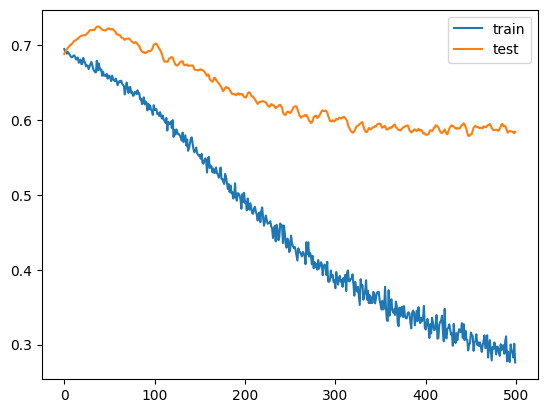

In [84]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

Early stopping

In [85]:
model=Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [91]:
history=model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=3500, verbose=0,callbacks=callback)

Epoch 245: early stopping


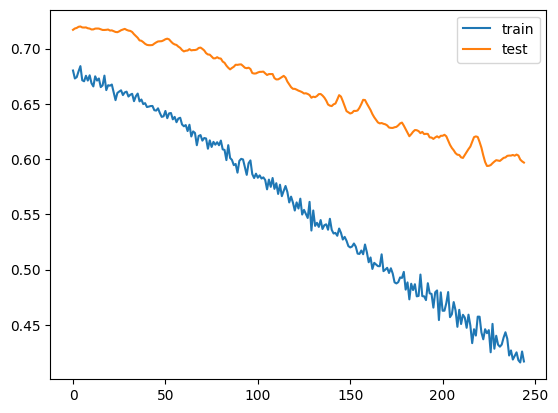

In [92]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()